In [18]:
 import pandas as pd
import numpy as np

In [22]:
df = pd.read_csv('list3.csv', header=None, sep=";") 

In [23]:
df.columns = ["x", "y", "time"]

In [24]:
df.head()

,x,y,time
0,97,52,808.661603
1,97,52,824.108565
2,54,54,17.321016
3,55,58,6.967280
4,75,17,153.908987


In [25]:
df.shape

(48, 3)

In [26]:
df = df[df.time < 15]

In [27]:
df.head()

,x,y,time
3,55,58,6.967280
5,36,76,2.762005
6,87,27,2.702556
7,77,26,11.476853
8,50,22,2.932524


In [28]:
df.time.mean()

3.9716175378751157

In [29]:
df.corr()

,x,y,time
x,1.000000,-0.092782,0.299572
y,-0.092782,1.000000,0.223979
time,0.299572,0.223979,1.000000


In [30]:

from sklearn import linear_model


In [31]:
regr = linear_model.LinearRegression()

In [32]:
X_train = df[["x", "y"]]

In [33]:
X_train["one_c"] = np.logical_or((df.x < 10), (df.y < 10))

In [34]:
Y = df["time"]

In [35]:
regr.fit(X_train, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [36]:
import numpy as np
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((regr.predict(X_train) - Y) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(X_train, Y))

('Coefficients: \n', array([ 0.0155063 ,  0.00546405, -1.97353428]))
Mean squared error: 3.59
Variance score: 0.25


In [37]:

import matplotlib.pyplot as plt

/Users/miguel/Desktop/pythonVirtual/BigData/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [38]:
%matplotlib inline

In [39]:
import seaborn as sns

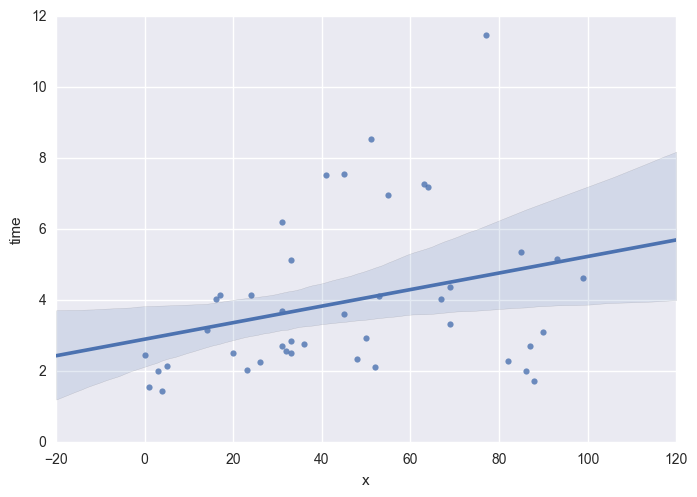

In [40]:
ax = sns.regplot( y=Y, x=X_train.x, data=df)

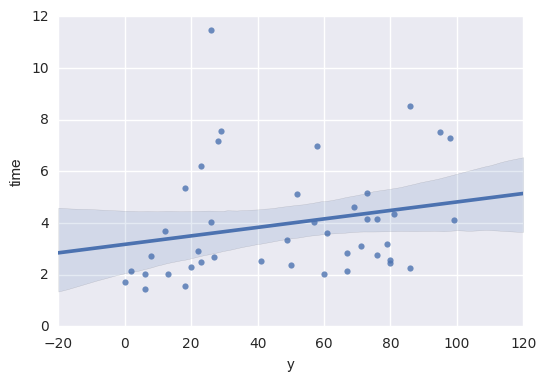

In [150]:
ax = sns.regplot( y=Y, x=X_train.y, data=df)

In [41]:
ax = sns.plot( x=X_train.one_c,  y=Y, data=df)

AttributeError: 'module' object has no attribute 'plot'

In [42]:
import cPickle
# save the classifier
with open('classifier.pkl', 'wb') as fid:
    cPickle.dump(regr, fid)   

In [43]:

with open('classifier.pkl', 'rb') as fid:
    regr_loaded = cPickle.load(fid)

In [44]:
regr_loaded.predict([0, 10, False])

/Users/miguel/Desktop/pythonVirtual/BigData/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([ 3.46249201])

In [45]:
regr_loaded.predict([0, 0])

/Users/miguel/Desktop/pythonVirtual/BigData/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


ValueError: shapes (1,2) and (3,) not aligned: 2 (dim 1) != 3 (dim 0)

In [75]:
regr_loaded.predict([100, 0])

/Users/miguel/Desktop/pythonVirtual/BigData/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([ 6.05748036])

In [155]:
X_train["even_y"] = df.y % 10

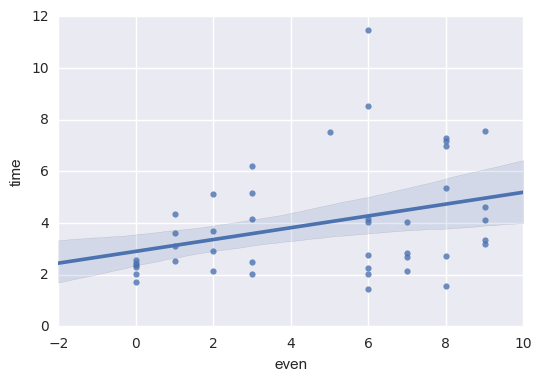

In [154]:
ax = sns.regplot( y=Y, x=X_train.even, data=df)

In [156]:
X_train["even_x"] = df.x % 10

In [160]:
regr.fit(X_train, Y)
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((regr.predict(X_train) - Y) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(X_train, Y))

('Coefficients: \n', array([ 0.0193128 ,  0.00386518, -2.00655589,  0.12139562,  0.12139562,
       -0.15014901]))
Mean squared error: 3.03
Variance score: 0.36


In [161]:

from sklearn.ensemble import GradientBoostingRegressor

In [176]:
est = GradientBoostingRegressor(n_estimators=100, learning_rate=0.5,
    max_depth=1, random_state=0, loss='ls').fit(X_train, Y)

print("Mean squared error: %.2f"
      % np.mean((est.predict(X_train) - Y) ** 2))

Mean squared error: 0.74


In [177]:

from sklearn.metrics import mean_squared_error

In [178]:
mean_squared_error(Y, est.predict(X_train)) 

0.7379191576886559

In [179]:
mean_squared_error(Y, regr.predict(X_train)) 

3.0294263594547028

In [180]:
import cPickle
# save the classifier
with open('classifier.pkl', 'wb') as fid:
    cPickle.dump(regr, fid)   

In [184]:
X_train = X_train.drop("even", 1)

In [185]:
est = GradientBoostingRegressor(n_estimators=100, learning_rate=0.5,
    max_depth=1, random_state=0, loss='ls').fit(X_train, Y)

print("Mean squared error: %.2f"
      % np.mean((est.predict(X_train) - Y) ** 2))

Mean squared error: 0.74


In [186]:
import cPickle
# save the classifier
with open('classifier.pkl', 'wb') as fid:
    cPickle.dump(est, fid)   

In [187]:
X_train.head()

,x,y,one_c,even_y,even_x
3,55,58,False,8,5
5,36,76,False,6,6
6,87,27,False,7,7
7,77,26,False,6,7
8,50,22,False,2,0
